# Rearrange layers with Matplotlib and Seaborn plots

## Setup

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
%%bigquery df
# Get NYC temperatures as sample data
SELECT
    year,
    mo AS month,
    AVG(temp) AS temp
FROM `bigquery-public-data.noaa_gsod.gsod*` 
WHERE 
    wban = '94728'
    AND CAST(mo AS INT64) <= 6
GROUP BY year, mo
ORDER BY year, mo

In [3]:
# Compute quartiles for each month
quartiles = (
    df
    .groupby('month')
    .quantile([.25, .75])
    .reset_index()
    .pivot(index='month', columns='level_1')
    .set_axis(['low', 'high'], axis=1)
)
quartiles

,low,high
month,,
01,28.928226,35.102419
02,32.170536,37.488793
03,39.147581,42.965323
04,50.396667,54.156667
05,60.135484,64.251613
06,69.716667,72.186667


## Reorder plot layers with z-order

In some cases, multiple plots over the same figure can be arranged in an unwanted order, that do not follow the sequence of the code.  
To rearrange the layers order, you can specify their z-index with `zorder`:

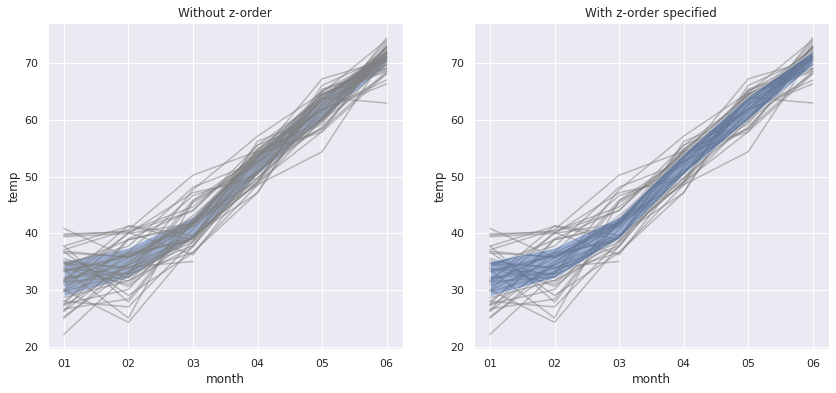

In [4]:
# Plot with default layers z-order
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.lineplot(data=df, x='month', y='temp', units='year', estimator=None, color='grey', alpha=.5, ax=ax[0])
ax[0].fill_between(x=quartiles.index, y1=quartiles['low'], y2=quartiles['high'], alpha=.5)
ax[0].set_title("Without z-order")

# Specify z-order
sns.lineplot(data=df, x='month', y='temp', units='year', estimator=None, color='grey', alpha=.5, ax=ax[1], zorder=1)
ax[1].fill_between(x=quartiles.index, y1=quartiles['low'], y2=quartiles['high'], alpha=.5, zorder=2)
ax[1].set_title("With z-order specified");